# Video Game Sales       

                                                                   By Raghunadh Puram, Reeta Bhanini, Mattie Mason

### Background

    It does not come to a surprise to anyone, when I say that video game sales over the last decade have increased in the number of sales. It is well documented that since 2012 the market value for video games has increased by a value of over 5 billion per year. During the third quarter 2020, according NASDAQ, consumers spent a whopping $11.2 billion on video games. That is around a 24% increase in year to year sales. Though most companies look at revenue, they also look at the games ratings.

Video game sales over the last decade have increased. Consumers are spending more money on videogames. Most companies look at revenue, however they also look at the game rating. This is an important variable to look at, because it can tell a company how well the game can potentially do in the public market, and thus increase overall sales. With the increase in the market for video games, we are curious about the relationship between critic scores and game user scores. What might this say about overall global sales? Does this relationship allow companies to maximize profits based on high ratings (and genre preferences)? Along with this, we plan to create video game reccomendations to people based on certain preferences. Due to having a large dataset, we will be looking specifically at the first one thousand games. Our dataset includes data from 2016.

### Questions

*1.Is there a relationship between Critic Scores and User Scores say about video games compared to global sales?*

*2. Based on a person's preferences, what video game would we recommend?*

*3. What kind of relationship is there that companies can look at to maximize profits but also create a game that has high ratings and what genres are most appealing to them? Specifically, I would look at the first thousand video games, which video game had the highest sales while having a high rating (8 + for User Score, 80+ for Critic Score)?*

In [67]:
#importing libraries and necessary packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import random 
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [12]:
#Reads the vgsales.csv file & removing the last 15,597 rows (too many value)
Video_Games_File = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', skipfooter = 15718) 
#drops the coloumns like Ranks & Other Sales
Video_Games_File_Sales_Columns = Video_Games_File.drop(columns =['Other_Sales','Developer','Critic_Count','User_Count','Year_of_Release']) 
# Gives the first 5 rows of the Data Set
Video_Games_File_Sales_Columns.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,8,E
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37,NaN,NaN,NaN


In [13]:
#Dropping NA values
Video_Games_File_new = Video_Games_File.dropna()
Video_Games_File_new.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [14]:
#Converting the variable "User_Score" to numeric values
Video_Games_File_new["User_Score"] = pd.to_numeric(Video_Games_File_new["User_Score"], downcast = "float")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

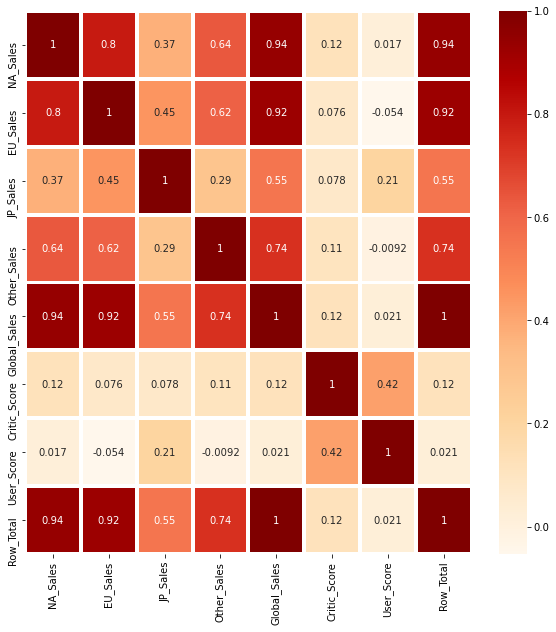

In [49]:
#Creating a mask 
Video_Games_File_Sales_Columns2 = Video_Games_File_new
#Drops coloumns like 'Name', 'Platform','Year_of_Release','Genre','Publisher','Critic_Count','User_Count','Developer'
Video_Games_File_Sales_Columns2 = Video_Games_File_Sales_Columns2.drop(columns=['Name', 'Platform','Year_of_Release','Genre','Publisher','Critic_Count','User_Count','Developer'],axis = 1)
#Drops Nan variables in dataframe
Video_Games_File_Sales_Columns2.dropna()
#Finds the corrmatrix of the mask
Video_Games_corrmatrix = Video_Games_File_Sales_Columns2.corr()
plt.figure(figsize=(10,10))
#Plots the heatmap of the corrmatrix.
sns.heatmap(Video_Games_corrmatrix, cmap = "OrRd", annot=True, linewidth=3)

In [68]:
# creates a variable with statsmodels.regression.linear_model and find the best fit for the model 
#for User_Score & Critic_Score
model = sm.OLS(Video_Games_File_new["User_Score"], Video_Games_File_new["Critic_Score"].astype(float))
results = model.fit()
#print("Intercept and slope are:", results.params)
#print(results.predict())
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             User_Score   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          2.670e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                        0.00
Time:                        00:44:01   Log-Likelihood:                         -1049.3
No. Observations:                 657   AIC:                                      2101.
Df Residuals:                     656   BIC:                                      2105.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

The Linear regression line has coefficent [[3.316195]] and the y-intercept  [56.81496]


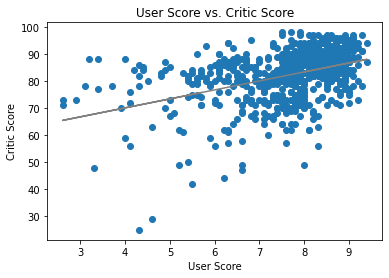

In [71]:
# plots the scatter plot where x is User_Score and y is Critic_Score
plt.scatter(Video_Games_File_new["User_Score"], Video_Games_File_new["Critic_Score"])
z = np.polyfit(Video_Games_File_new["User_Score"], Video_Games_File_new["Critic_Score"], 1)
p = np.poly1d(z)
plt.plot(Video_Games_File_new["User_Score"], p(Video_Games_File_new["User_Score"]), "gray")
plt.xlabel("User Score")
plt.ylabel("Critic Score")
plt.title("User Score vs. Critic Score")

#Gives a new shape to an array(Video_Games_File_Sales_Columns1_Critic & Video_Games_File_Sales_Columns1_User) without changing its data.

Video_Games_File_Sales_Columns1_Critic = Video_Games_File_new["Critic_Score"].values.reshape(-1, 1)
Video_Games_File_Sales_Columns1_User = Video_Games_File_new["User_Score"].values.reshape(-1, 1)

line = linear_model.LinearRegression()
#Finds the line of best fit for User_Score & Critic_Score
line.fit(Video_Games_File_Sales_Columns1_User,Video_Games_File_Sales_Columns1_Critic) 
print("The Linear regression line has coefficent" ,line.coef_,"and the y-intercept ", line.intercept_)



In [72]:
# creates a variable with statsmodels.regression.linear_model and find the best fit for the model.
#for Critic_Score & Global_Sales
model = sm.OLS(Video_Games_File_new["Critic_Score"], Video_Games_File_new["Global_Sales"])
results = model.fit()
#print("Intercept and slope are:", results.params)
#print(results.predict())
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Critic_Score   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              520.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                    2.76e-85
Time:                        00:45:06   Log-Likelihood:                         -3640.8
No. Observations:                 657   AIC:                                      7284.
Df Residuals:                     656   BIC:                                      7288.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


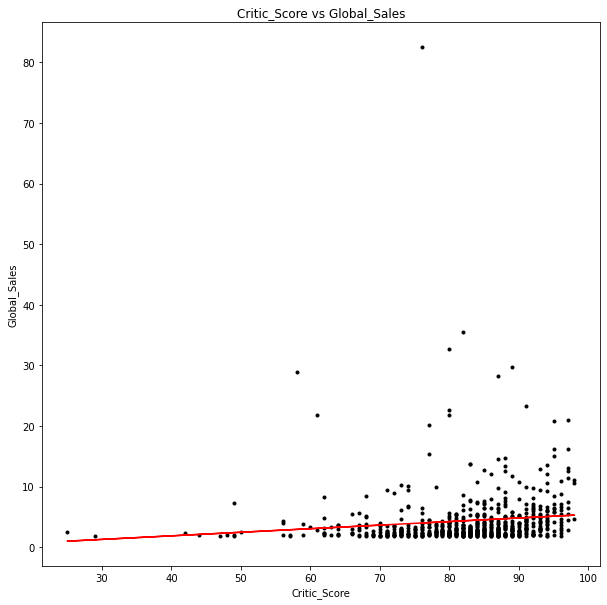

The Linear regression line has coefficent [[0.05890245]] and the y-intercept  [-0.49398422]


In [74]:
plt.figure(figsize=(10,10))

# Changes all integer variables in Row_Total & Critic_Score into float variables. 
Video_Games_File_new["Global_Sales"] = pd.to_numeric(Video_Games_File_new["Global_Sales"], downcast="float")
Video_Games_File_new["Critic_Score"] = pd.to_numeric(Video_Games_File_new["Critic_Score"], downcast="float")
Video_Games_File_new

line = linear_model.LinearRegression()
#Gives a new shape to an array(Video_Games_File_Sales_Columns1_Critic & Video_Games_File_Sales_Columns1_Total) without changing its data.
Video_Games_File_Sales_Columns1_Critic = Video_Games_File_new.loc[:,"Critic_Score"].values.reshape(-1, 1) 
Video_Games_File_Sales_Columns1_Total = Video_Games_File_new.loc[:,"Global_Sales"].values.reshape(-1, 1)

#set the two variables relationship and calls the Linear Regression
line.fit(Video_Games_File_Sales_Columns1_Critic,Video_Games_File_Sales_Columns1_Total) 

#Set the line fit equation where the x value is the Video_Games_File_Sales_Columns1_Critic
pred_line = line.predict(Video_Games_File_Sales_Columns1_Critic)

# plots the scatter plot where x is and y is Global_Sales
plt.scatter('Critic_Score', 'Global_Sales', data = Video_Games_File_new, marker = '.', color = 'black')

plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")

#plots the line fit equation where the x value is the Video_Games_File_Sales_Columns1_Critic and y is the resulting y value
plt.plot(Video_Games_File_Sales_Columns1_Critic, pred_line, color='red')
plt.title("Critic_Score vs Global_Sales")
plt.show()

print("The Linear regression line has coefficent" ,line.coef_,"and the y-intercept ", line.intercept_)

In [53]:
# creates a variable with statsmodels.regression.linear_model and find the best fit for the model.
model = sm.OLS(Video_Games_File_new["User_Score"], Video_Games_File_new["Global_Sales"])
results = model.fit()
#print("Intercept and slope are:", results.params)
#print(results.predict())
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             User_Score   R-squared (uncentered):                   0.427
Model:                            OLS   Adj. R-squared (uncentered):              0.426
Method:                 Least Squares   F-statistic:                              488.5
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                    2.47e-81
Time:                        00:13:33   Log-Likelihood:                         -2091.9
No. Observations:                 657   AIC:                                      4186.
Df Residuals:                     656   BIC:                                      4190.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


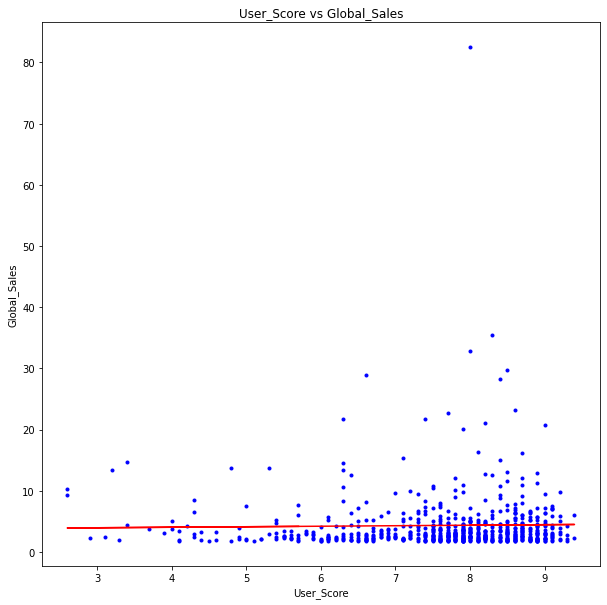

The Linear regression line has coefficent [[0.08375914]] and the y-intercept  [3.7023606]


In [75]:
plt.figure(figsize=(10,10))
# Changes all integer variables in Row_Total & User_Score into float variables. 
Video_Games_File_new["Global_Sales"] = pd.to_numeric(Video_Games_File_new["Global_Sales"], downcast="float")
Video_Games_File_new["User_Score"] = pd.to_numeric(Video_Games_File_new["User_Score"], downcast="float")


line = linear_model.LinearRegression()
#Gives a new shape to an array(Video_Games_File_Sales_Columns1_user & Video_Games_File_Sales_Columns1_total) without changing its data.
Video_Games_File_Sales_Columns1_user = Video_Games_File_new.loc[:,"User_Score"].values.reshape(-1, 1) 
Video_Games_File_Sales_Columns1_total = Video_Games_File_new.loc[:,"Global_Sales"].values.reshape(-1, 1)

#set the two variables relationship and calls the Linear Regression
line.fit(Video_Games_File_Sales_Columns1_user,Video_Games_File_Sales_Columns1_total)

#Set the line fit equation where the x value is the Video_Games_File_Sales_Columns1_user
pred = line.predict(Video_Games_File_Sales_Columns1_user)

# plots the scatter plot where x is User_Score and y is Global_Sales
plt.scatter('User_Score', 'Global_Sales', data = Video_Games_File_new, marker = '.', color = 'blue')

plt.xlabel("User_Score")
plt.ylabel("Global_Sales")

#plots the line fit equation where the x value is the Video_Games_File_Sales_Columns1_user
plt.plot(Video_Games_File_Sales_Columns1_user, pred, color='red')
plt.title("User_Score vs Global_Sales")
plt.show()

print("The Linear regression line has coefficent" ,line.coef_,"and the y-intercept ", line.intercept_)

Text(0.5, 1.0, 'Genre Contribution to Sales')

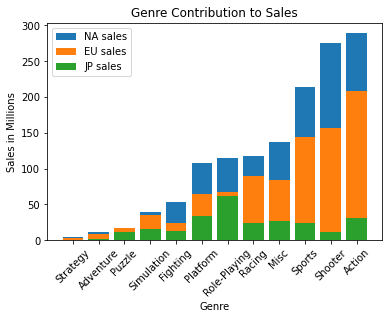

In [62]:
#Create a graph by Genre sum and shows the proportion of the three major sales regions.
Video_Games_Filegenre = Video_Games_File_new.groupby("Genre").sum()
Video_Games_Filegenre = Video_Games_Filegenre.sort_values("Global_Sales")
#plt.bar(Video_Games_Filegenre.index, "Global_Sales", data = Video_Games_Filegenre, label = "Global sales" )
plt.bar(Video_Games_Filegenre.index, "NA_Sales", data = Video_Games_Filegenre, label = "NA sales" )
plt.bar(Video_Games_Filegenre.index, "EU_Sales", data = Video_Games_Filegenre, label = "EU sales" )
plt.bar(Video_Games_Filegenre.index, "JP_Sales", data = Video_Games_Filegenre, label = "JP sales" )
plt.xticks(rotation = 45.0)
plt.legend()
plt.xlabel("Genre")
plt.ylabel("Sales in Millions")
plt.title("Genre Contribution to Sales")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

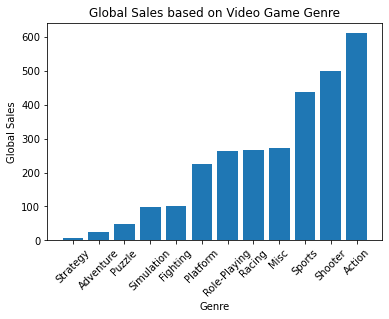

In [26]:
Video_Games_Filegenre = Video_Games_File_new.groupby("Genre").sum()
Video_Games_Filegenre = Video_Games_Filegenre.sort_values("Global_Sales")
plt.bar(Video_Games_Filegenre.index, "Global_Sales", data = Video_Games_Filegenre )
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.title("Global Sales based on Video Game Genre")
plt.xticks(rotation = 45)

In [27]:
import statsmodels.api as sm # import statsmodels 
import statsmodels.formula.api as smf

# creates a variable with statsmodels.regression.linear_model and find the best fit for the model in an augmented order
model = smf.ols(formula='User_Score ~ Critic_Score + Rating', data=Video_Games_File_Sales_Columns2)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             User_Score   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     29.24
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.65e-31
Time:                        23:40:01   Log-Likelihood:                -995.98
No. Observations:                 657   AIC:                             2006.
Df Residuals:                     650   BIC:                             2037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4238      1.187      2.885      0.004       1.094       5.754
Rating[T.E]       -0.4171      1.112     -0.375      0.708      -2.600       1.766
Rating[T.E10+]    -0.1145      1.118     -0.102      0.918      -2.311       2.082
Rating[T.K-A]     -1.1443      1.567     -0.730      0.465      -4.221       1.932
Rating[T.M]       -0.6761      1.111     -0.608      0.543      -2.858       1.506
Rating[T.T]       -0.0610      1.112     -0.055      0.956      -2.245       2.123
Critic_Score       0.0557      0.005     12.175      0.000       0.047       0.065
==============================================================================
Omnibus:                      157.157   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.744
Skew:                          -1.330   Prob(JB):                     3.70e-70
Kurtosis:                       5.147   Cond. No.                     5.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#creates a variable with statsmodels.regression.linear_model and find the best fit for the model in an augmented order
#for Critic_Score ~ User_Score + Rating
model = smf.ols(formula='Critic_Score ~ User_Score + Rating', data=Video_Games_File_Sales_Columns2)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     36.44
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.09e-38
Time:                        23:40:09   Log-Likelihood:                -2340.7
No. Observations:                 657   AIC:                             4695.
Df Residuals:                     650   BIC:                             4727.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.3068      8.895      7.230      0.000      46.841      81.773
Rating[T.E]       -9.4820      8.601     -1.102      0.271     -26.372       7.408
Rating[T.E10+]   -12.0329      8.647     -1.392      0.165     -29.012       4.946
Rating[T.K-A]      3.0037     12.134      0.248      0.805     -20.823      26.831
Rating[T.M]       -3.8935      8.604     -0.453      0.651     -20.789      13.002
Rating[T.T]       -7.8599      8.605     -0.913      0.361     -24.756       9.037
User_Score         3.3364      0.274     12.175      0.000       2.798       3.875
==============================================================================
Omnibus:                      129.347   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.792
Skew:                          -1.052   Prob(JB):                     4.35e-64
Kurtosis:                       5.496   Cond. No.                         499.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#creates a variable with statsmodels.regression.linear_model and find the best fit for the model in an augmented order
#for an augmented order of User_Score ~ Global_Sales + Critic_Score
model = smf.ols(formula= 'User_Score ~ Global_Sales + Critic_Score', data=Video_Games_File_Sales_Columns2)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             User_Score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     69.42
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.56e-28
Time:                        00:41:20   Log-Likelihood:                -1011.2
No. Observations:                 657   AIC:                             2028.
Df Residuals:                     654   BIC:                             2042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2985      0.370      8.923      0.000       2.573       4.024
Global_Sales    -0.0071      0.009     -0.794      0.428      -0.025       0.010
Critic_Score     0.0530      0.005     11.768      0.000       0.044       0.062
==============================================================================
Omnibus:                      167.165   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.680
Skew:                          -1.383   Prob(JB):                     1.30e-78
Kurtosis:                       5.334   Cond. No.                         694.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#creates a variable with statsmodels.regression.linear_model and find the best fit for the model in an augmented order
#for an augmented order of Critic_Score ~ Global_Sales + User_Score
model = smf.ols(formula= 'Critic_Score ~ Global_Sales + User_Score', data=Video_Games_File_Sales_Columns2)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     74.78
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           5.64e-30
Time:                        00:41:35   Log-Likelihood:                -2368.3
No. Observations:                 657   AIC:                             4743.
Df Residuals:                     654   BIC:                             4756.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.0133      2.178     25.720      0.000      51.737      60.290
Global_Sales     0.2165      0.070      3.079      0.002       0.078       0.355
User_Score       3.2981      0.280     11.768      0.000       2.748       3.848
==============================================================================
Omnibus:                      138.320   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.402
Skew:                          -1.145   Prob(JB):                     4.34e-65
Kurtosis:                       5.363   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.preprocessing import StandardScaler
X = Video_Games_File_new[['Critic_Score', 'User_Score', 'Global_Sales']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [59]:
#Creates a Kmeans Graph with 4 clusters and 10 iterations
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_

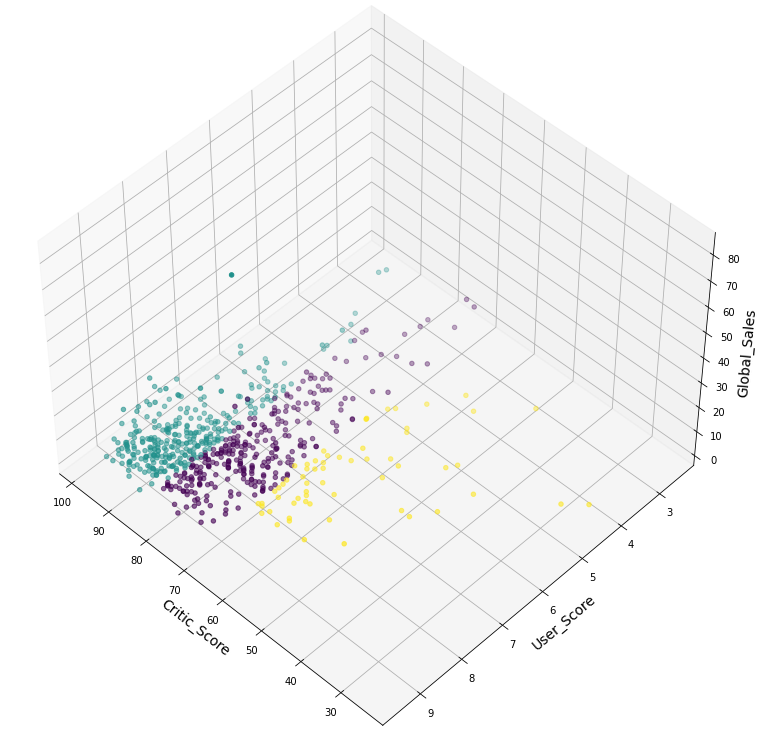

In [60]:
# Creates the 3D Graph with x as Critic_Score, y as User_Score, z as Global_Sales
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(13,10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Critic_Score', fontsize = 14)
ax.set_ylabel('User_Score', fontsize = 14)
ax.set_zlabel('Global_Sales', fontsize = 14)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))

In [57]:

class Player():
    
    def __init__(self, publisher, platform, genre,rating):
        '''Initial Function that sets up
           the four variables.
           '''
        self.publisher = publisher
        self.platform = platform
        self.genre = genre
        self.rating = rating
        
    def platform_preference(self):
        '''Function that returns the filter of Platform input'''
        filter_platform = Video_Games_File_new[Video_Games_File_new['Platform'] == self.platform]
        return filter_platform
    
    def genre_preference(self):
        '''Function that returns the filter of Genre input'''

        filter_genre = Video_Games_File_new[Video_Games_File_new['Genre'] == self.genre]
        return filter_genre
    
    def publisher_preference(self):
        '''Function that returns the filter of Publisher input'''

        userscore_filter = Video_Games_File_new[Video_Games_File_new['Publisher'] == self.publisher]
        return userscore_filter
    
    def final_preference(self):
        '''Function that returns the filter of all inputs given by the user with only the names of the games'''

        final_filter = Video_Games_File_new[Video_Games_File_new['Publisher'] == self.publisher]
        final_filter = final_filter[final_filter['Platform'] == self.platform]
        final_filter = final_filter[final_filter['Genre'] == self.genre]
        final_filter = final_filter[final_filter['Rating'] == self.rating]
        
        return final_filter['Name'].tolist()
    


In [58]:
Kyle = Player('Nintendo', 'Wii', 'Sports','E').final_preference()
Kyle

['Wii Sports',
 'Wii Sports Resort',
 'Wii Fit',
 'Wii Fit Plus',
 'Mario Sports Mix',
 'Mario Super Sluggers']